# 0.) Import the Credit Card Fraud Data From CCLE

In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [5]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]

<ipython-input-8-3a93eb7a5054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-8-3a93eb7a5054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


In [9]:
X = pd.get_dummies(df_select, ['category']).drop(['trans_date_trans_time', 'is_fraud'], axis = 1)
y = df['is_fraud']

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [13]:
#oversampling
ros = RandomOverSampler(random_state=0)
over_X, over_y = ros.fit_resample(X,y)


In [14]:
#undersampling
rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X,y)

In [15]:
#SMOTE
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X,y)

# 3.) Train three logistic regression models 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
#oversample 
over_log = LogisticRegression().fit(over_X, over_y)

#undersample
under_log = LogisticRegression().fit(under_X, under_y)

#SMOTE
smote_mod = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [18]:
#oversample
y_over = over_log.predict(X_test)

#undersample
y_under = under_log.predict(X_test)

#smote 
y_smote = smote_mod.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

In [19]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [23]:
#oversample
tn_o, fp_o, fn_o, tp_o = confusion_matrix(y_test, y_over).ravel()
sensitivity_o = tp_o/(tp_o + fn_o)
specificity_o = tn_o/(tn_o + fp_o)
sensitivity_o, specificity_o, accuracy_score(y_test, y_over), precision_score(y_test, y_over)

(0.7488226059654631,
 0.8135826925740159,
 0.8133352527651815,
 0.015173203549957057)

In [25]:
#undersample
tn_u, fp_u, fn_u, tp_u = confusion_matrix(y_test, y_under).ravel()
sensitivity_u = tp_u/(tp_u + fn_u)
specificity_u = tn_u/(tn_u + fp_u)
sensitivity_u, specificity_u, accuracy_score(y_test, y_under), precision_score(y_test, y_under)


(0.7472527472527473,
 0.8159731212254409,
 0.8157105496772955,
 0.015335545603917653)

In [26]:
#smote
tn_s, fp_s, fn_s, tp_s = confusion_matrix(y_test, y_smote).ravel()
sensitivity_s = tp_s/(tp_s + fn_s)
specificity_s = tn_s/(tn_s + fp_s)
sensitivity_s, specificity_s, accuracy_score(y_test, y_smote), precision_score(y_test, y_smote)

(0.7425431711145997,
 0.8199290699004691,
 0.819633388516999,
 0.015569966094999835)

The Smote model has the best performance as it has the highest sensitivity, specificity, accuracy and precision.

# 6.) Pick two features and plot the two classes before and after SMOTE.

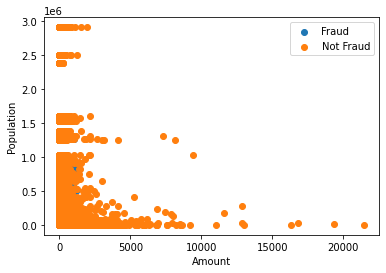

In [35]:
raw_temp = pd.concat([X_train, y_train], axis = 1)
plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'],\
            raw_temp[raw_temp['is_fraud'] == 1]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'],\
            raw_temp[raw_temp['is_fraud'] == 0]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.plot()
plt.show()

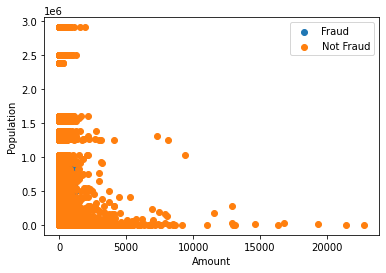

In [36]:
raw_temp1 = pd.concat([smote_X, smote_y], axis = 1)
plt.scatter(raw_temp1[raw_temp1['is_fraud'] == 1]['amt'],\
            raw_temp1[raw_temp1['is_fraud'] == 1]['city_pop'])
plt.scatter(raw_temp1[raw_temp1['is_fraud'] == 0]['amt'],\
            raw_temp1[raw_temp1['is_fraud'] == 0]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.plot()
plt.show()